In [1]:
%cd .
%pwd
%cd "raw_data/205_HGT_VarLength_ProbSweep/"
#%mkdir "analysis"
%cd "analysis"
%pwd

/home/rosiec/Dropbox/School_Docs/Research/HGT
/home/rosiec/Dropbox/School_Docs/Research/HGT/raw_data/205_HGT_VarLength_ProbSweep
/home/rosiec/Dropbox/School_Docs/Research/HGT/raw_data/205_HGT_VarLength_ProbSweep/analysis


u'/home/rosiec/Dropbox/School_Docs/Research/HGT/raw_data/205_HGT_VarLength_ProbSweep/analysis'

In [43]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.17.1'

In [24]:
#%pwd
%cat ../P_0.001_hgtbonus_205001/data_hgtbonus/average.dat | head

# Avida Average Data
# Fri Jan 15 21:32:40 2016
#  1: Update
#  2: Merit
#  3: Gestation Time
#  4: Fitness
#  5: Repro Rate?
#  6: (deprecated) Size
#  7: Copied Size
#  8: Executed Size
cat: write error: Broken pipe


In [25]:
import sys
sys.path.append("../../../../research_scripts/")
%run ../../../../research_scripts/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --data_members=MEMBER_COUNT
                        Number of Components from a given data source
                        (treatment)
  --alt_axis=ALT_AXIS   Use an alternative axis for the Nth data source
  --xtick_multiplier=XTICK_MULTIPLIER
                        X-axis Tick Multipliers
  --ylog                Y-axis logarithmic

Aggregating control
Aggregating P_0
Aggregating P_0.001
Aggregating P_0.01
Aggregating P_0.1
Aggregating P_0.5
Aggregating P_1

Plotting 205_fitness


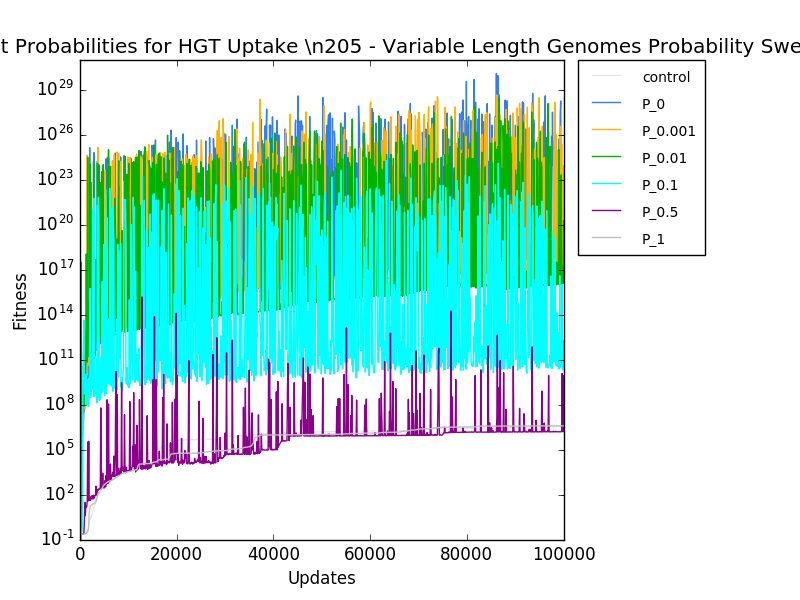

In [26]:
%run ../../../../research_scripts/quickplot.py --error --samples 100 \
--ylog --title "Fitness at Different Probabilities for HGT Uptake \n\
205 - Variable Length Genomes Probability Sweep" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
205_fitness \
average.dat 4 \"../P_0_control_*/data*/\" control \
average.dat 4 \"../P_0_hgtbonus_*/data*/\" P_0 \
average.dat 4 \"../P_0.001_hgtbonus_*/data*/\" P_0.001 \
average.dat 4 \"../P_0.01_hgtbonus_*/data*/\" P_0.01 \
average.dat 4 \"../P_0.1_hgtbonus_*/data*/\" P_0.1 \
average.dat 4 \"../P_0.5_hgtbonus_*/data*/\" P_0.5 \
average.dat 4 \"../P_1_hgtbonus_*/data*/\" P_1 

ipyImage(filename='205_fitness.png') 

In [27]:
cat ../P_0.1_hgtbonus_205001/data*/hgt.dat | head -n 15

# Horizontal gene transfer statistics
# Fri Jan 15 20:09:33 2016
#  1: Update [update]
#  2: Total count of metabolized genome fragments [metcount]
#  3: Total size of metabolized genome fragments [metsize]
#  4: Total count of insertion events [inscount]
#  5: Total size of insertion events [inssize]
#  6: Simple count of insertion events [inscount] DEBUG-RCK
#  7: Simple count of uptake events [inscount] DEBUG-RCK
#  8: Simple count of recombination events [inscount] DEBUG-RCK
#  9: Simple count of bonus events [inscount] DEBUG-RCK

0 0 0 0 0 0 0 0 0 
100 0 0 0 0 0 0 0 0 
200 0 0 0 0 0 32 3 29 


Aggregating control_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating control_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating control_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.001_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.001_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.001_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.01_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.01_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.01_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.1_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.1_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.1_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.5_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.5_Rec
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.5_Bon
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_1_Up
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_1_Rec
~~SKIPPING, PLOTTING ONLY~~
Ag

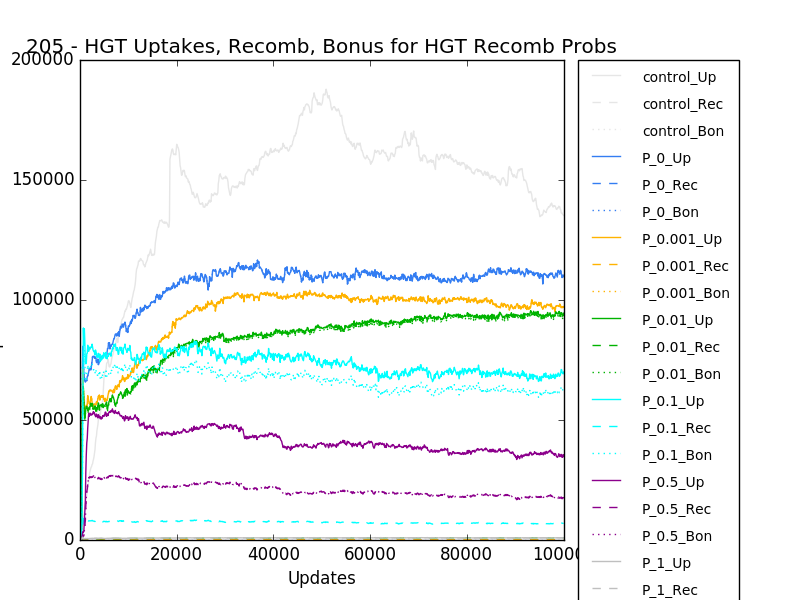

In [28]:
%run ../../../../research_scripts/quickplot.py --samples 100 \
--title "205 - HGT Uptakes, Recomb, Bonus for HGT Recomb Probs" \
--xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members 3 \
205_hgtbonus_uptakerecbon \
hgt.dat 7 \"../P_0_control_*/data*/\" control_Up \
hgt.dat 8 \"../P_0_control_*/data*/\" control_Rec \
hgt.dat 9 \"../P_0_control_*/data*/\" control_Bon \
hgt.dat 7 \"../P_0_hgtbonus*/data*/\" P_0_Up \
hgt.dat 8 \"../P_0_hgtbonus*/data*/\" P_0_Rec \
hgt.dat 9 \"../P_0_hgtbonus*/data*/\" P_0_Bon \
hgt.dat 7 \"../P_0.001_hgtbonus*/data*/\" P_0.001_Up \
hgt.dat 8 \"../P_0.001_hgtbonus*/data*/\" P_0.001_Rec \
hgt.dat 9 \"../P_0.001_hgtbonus*/data*/\" P_0.001_Bon \
hgt.dat 7 \"../P_0.01_hgtbonus*/data*/\" P_0.01_Up \
hgt.dat 8 \"../P_0.01_hgtbonus*/data*/\" P_0.01_Rec \
hgt.dat 9 \"../P_0.01_hgtbonus*/data*/\" P_0.01_Bon \
hgt.dat 7 \"../P_0.1_hgtbonus*/data*/\" P_0.1_Up \
hgt.dat 8 \"../P_0.1_hgtbonus*/data*/\" P_0.1_Rec \
hgt.dat 9 \"../P_0.1_hgtbonus*/data*/\" P_0.1_Bon \
hgt.dat 7 \"../P_0.5_hgtbonus*/data*/\" P_0.5_Up \
hgt.dat 8 \"../P_0.5_hgtbonus*/data*/\" P_0.5_Rec \
hgt.dat 9 \"../P_0.5_hgtbonus*/data*/\" P_0.5_Bon \
hgt.dat 7 \"../P_1_hgtbonus*/data*/\" P_1_Up \
hgt.dat 8 \"../P_1_hgtbonus*/data*/\" P_1_Rec \
hgt.dat 9 \"../P_1_hgtbonus*/data*/\" P_1_Bon 


ipyImage(filename='205_hgtbonus_uptakerecbon.png') 

Aggregating control_Up
Aggregating control_Rec
Aggregating control_Bon
Aggregating P_0_Up
Aggregating P_0_Rec
Aggregating P_0_Bon
Aggregating P_0.001_Up
Aggregating P_0.001_Rec
Aggregating P_0.001_Bon
Aggregating P_0.01_Up
Aggregating P_0.01_Rec
Aggregating P_0.01_Bon
Aggregating P_0.1_Up
Aggregating P_0.1_Rec
Aggregating P_0.1_Bon
Aggregating P_0.5_Up
Aggregating P_0.5_Rec
Aggregating P_0.5_Bon
Aggregating P_1_Up
Aggregating P_1_Rec
Aggregating P_1_Bon

Plotting 205_hgt_uptakerecbon


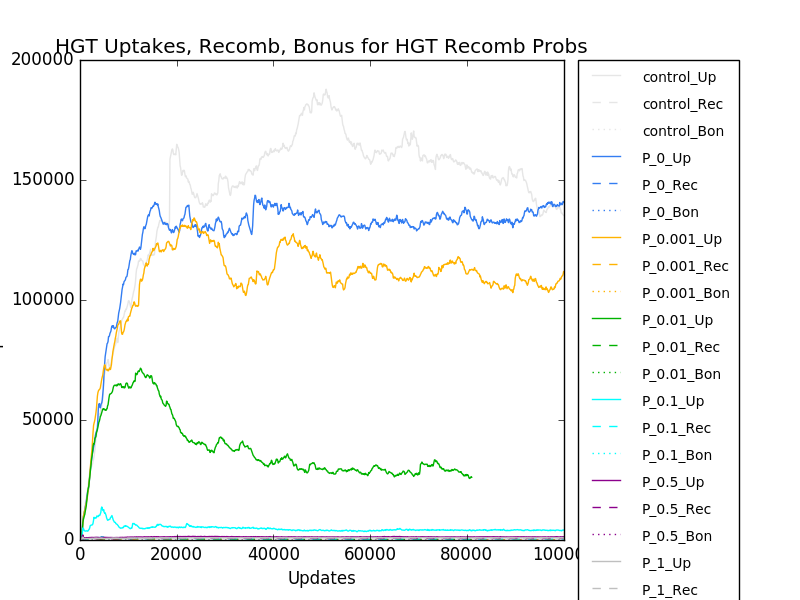

In [29]:
%run ../../../../research_scripts/quickplot.py --samples 100 \
--title "HGT Uptakes, Recomb, Bonus for HGT Recomb Probs" \
--xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members 3 \
205_hgt_uptakerecbon \
hgt.dat 7 \"../P_0_control_*/data*/\" control_Up \
hgt.dat 8 \"../P_0_control_*/data*/\" control_Rec \
hgt.dat 9 \"../P_0_control_*/data*/\" control_Bon \
hgt.dat 7 \"../P_0_hgt_*/data*/\" P_0_Up \
hgt.dat 8 \"../P_0_hgt_*/data*/\" P_0_Rec \
hgt.dat 9 \"../P_0_hgt_*/data*/\" P_0_Bon \
hgt.dat 7 \"../P_0.001_hgt_*/data*/\" P_0.001_Up \
hgt.dat 8 \"../P_0.001_hgt_*/data*/\" P_0.001_Rec \
hgt.dat 9 \"../P_0.001_hgt_*/data*/\" P_0.001_Bon \
hgt.dat 7 \"../P_0.01_hgt_*/data*/\" P_0.01_Up \
hgt.dat 8 \"../P_0.01_hgt_*/data*/\" P_0.01_Rec \
hgt.dat 9 \"../P_0.01_hgt_*/data*/\" P_0.01_Bon \
hgt.dat 7 \"../P_0.1_hgt_*/data*/\" P_0.1_Up \
hgt.dat 8 \"../P_0.1_hgt_*/data*/\" P_0.1_Rec \
hgt.dat 9 \"../P_0.1_hgt_*/data*/\" P_0.1_Bon \
hgt.dat 7 \"../P_0.5_hgt_*/data*/\" P_0.5_Up \
hgt.dat 8 \"../P_0.5_hgt_*/data*/\" P_0.5_Rec \
hgt.dat 9 \"../P_0.5_hgt_*/data*/\" P_0.5_Bon \
hgt.dat 7 \"../P_1_hgt_*/data*/\" P_1_Up \
hgt.dat 8 \"../P_1_hgt_*/data*/\" P_1_Rec \
hgt.dat 9 \"../P_1_hgt_*/data*/\" P_1_Bon 

ipyImage(filename='205_hgt_uptakerecbon.png') 

In [30]:
def plot_it(TREATM, #205 
               PROB, #0.001 
               filename, #hgt.dat
               descr, #HGT Uptakes
               columns, #[7,8]
               colnames, #['U','R'] 
               subtreats, #['control', 'hgt', 'hgtbonus', 'bonus']
               basename, #hgt_uptake_recomb 
               verbose=True):
    ROOT_TREATMENT="P_"+PROB

    !echo $ROOT_TREATMENT
    !echo $TREATM

    #!python2
    script = ' \
../../../../research_scripts/quickplot.py --error --samples 100 \
--title "' + descr + ' (Uptake_P: '+PROB+')" \
--xlabel "Updates" \
--ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members '+ str(len(columns)) +' \
'+TREATM+'_'+basename+'_'+PROB+' \
'
    for trt in subtreats:
        for col, coln in zip(columns, colnames):
            script += filename + ' '\
            + str(col) + ' "../'\
            + ROOT_TREATMENT + '_' + trt + '_*/data*/" ' + trt + '_' + coln + ' '
    
    if verbose:
        script += '\
2>/dev/null'
        print script
    else:
        script += '\
>/dev/null 2>&1'
        print script
        
    !python2 $script
    
    return TREATM+'_'+basename+'_'+PROB+'.png'



In [31]:
def hgt_recomb(TREATM, #205 
               PROB, #0.001
               verbose=True):
    
    return plot_it(TREATM, PROB, "hgt.dat", "HGT Uptakes", 
           [7,8], ['U','R'], ['control', 'hgt', 'hgtbonus', 'bonus'], 
           "hgt_uptake_recomb", verbose=verbose)
    

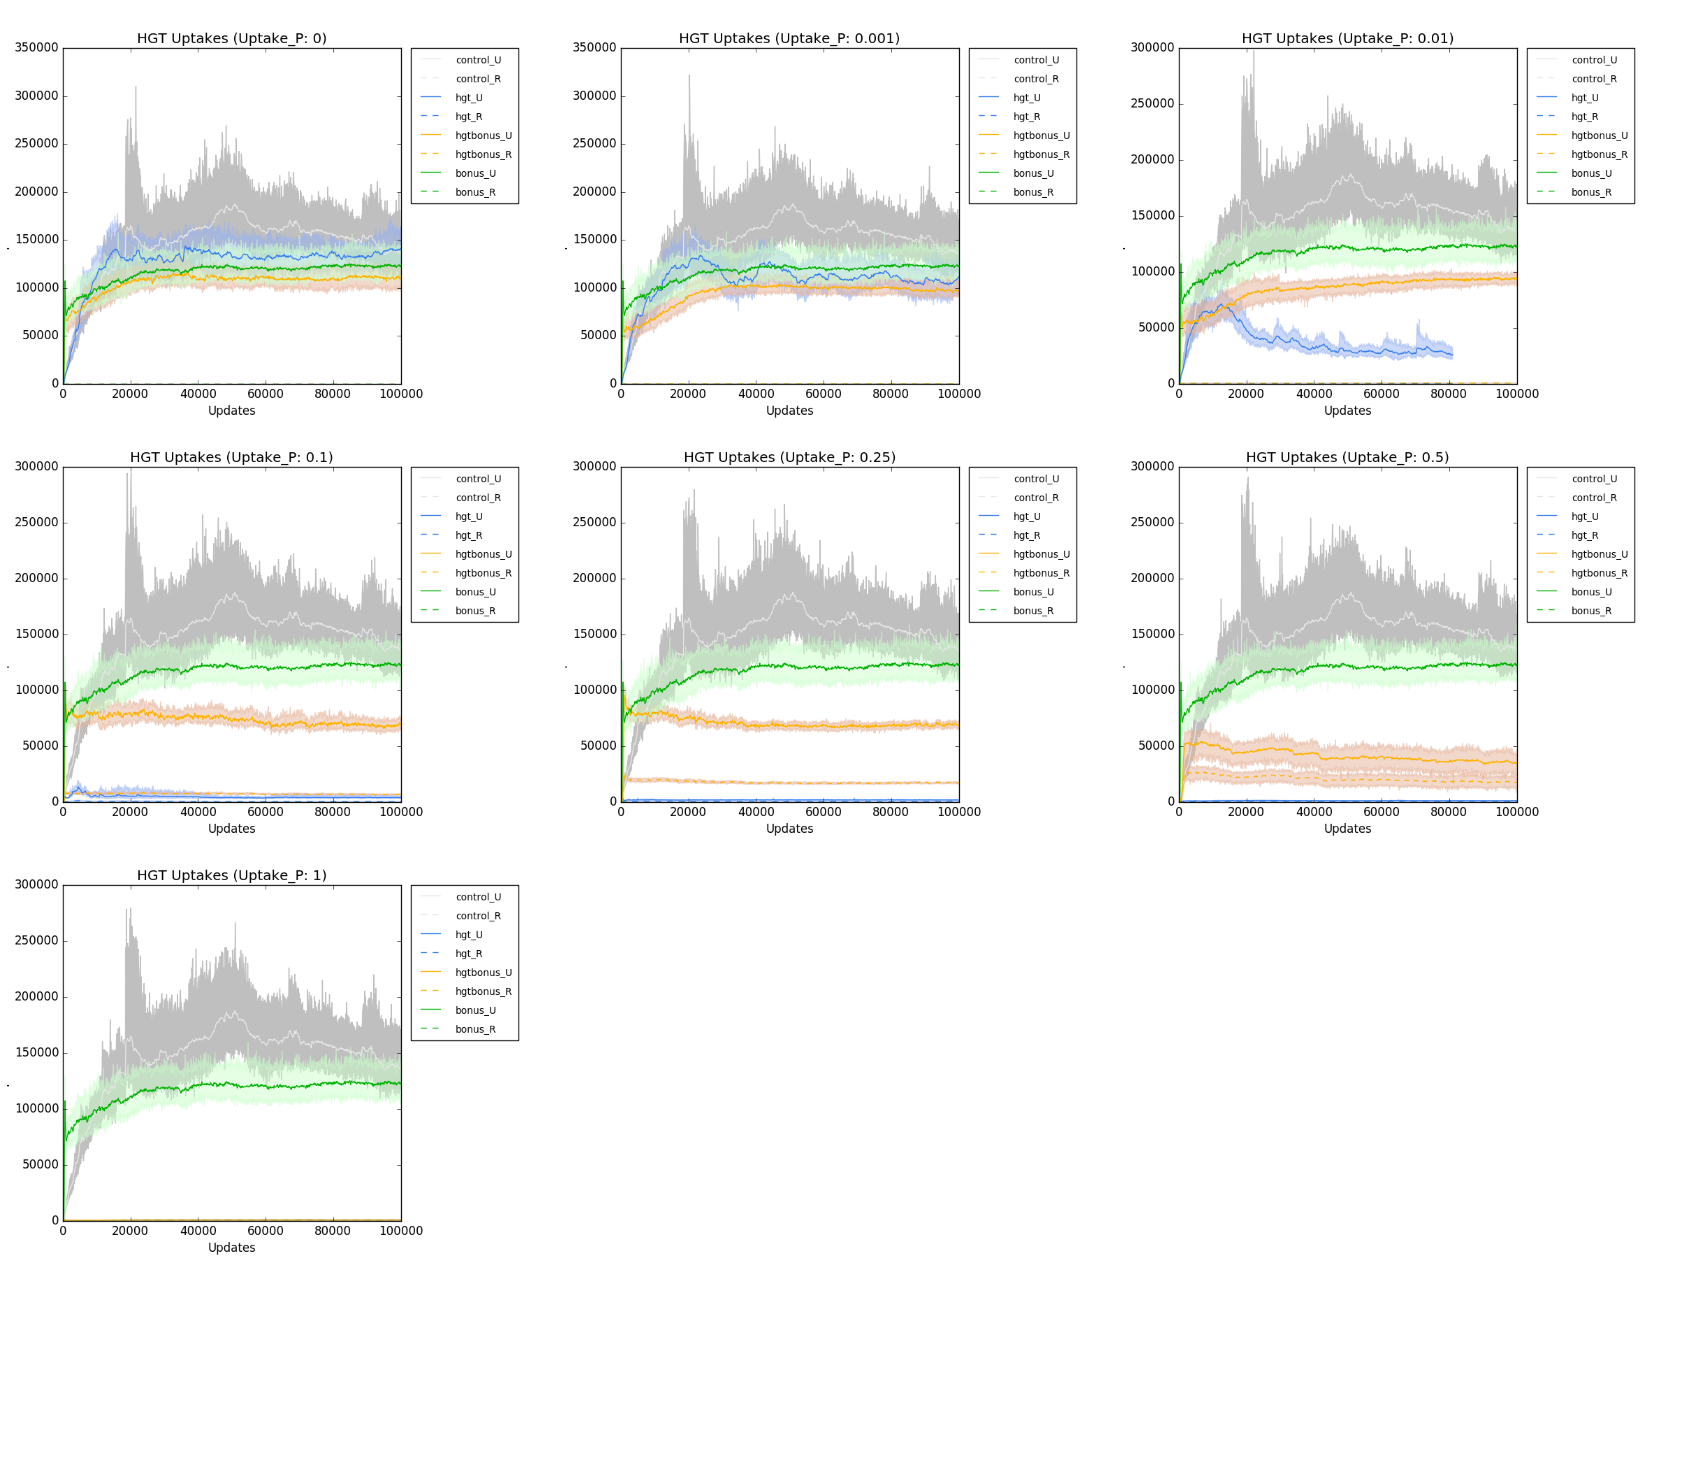

In [32]:
#probs = ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '1']
#files = []
#for p in probs:
#    display(Image(filename=hgt_recomb("205", p, verbose=False)))
##    files.append(hgt_recomb("205", p, verbose=False))
#
files = ['205_hgt_uptake_recomb_0.png',
 '205_hgt_uptake_recomb_0.001.png',
 '205_hgt_uptake_recomb_0.01.png',
 '205_hgt_uptake_recomb_0.1.png',
 '205_hgt_uptake_recomb_0.25.png',
 '205_hgt_uptake_recomb_0.5.png',
 '205_hgt_uptake_recomb_1.png']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,30),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=0)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()

Aggregating control_c
~~SKIPPING, PLOTTING ONLY~~
Aggregating control_e
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0_c
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0_e
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.001_c
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.001_e
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.01_c
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.01_e
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.1_c
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.1_e
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.5_c
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_0.5_e
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_1_c
~~SKIPPING, PLOTTING ONLY~~
Aggregating P_1_e
~~SKIPPING, PLOTTING ONLY~~

Plotting 205_copied_and_exec_size


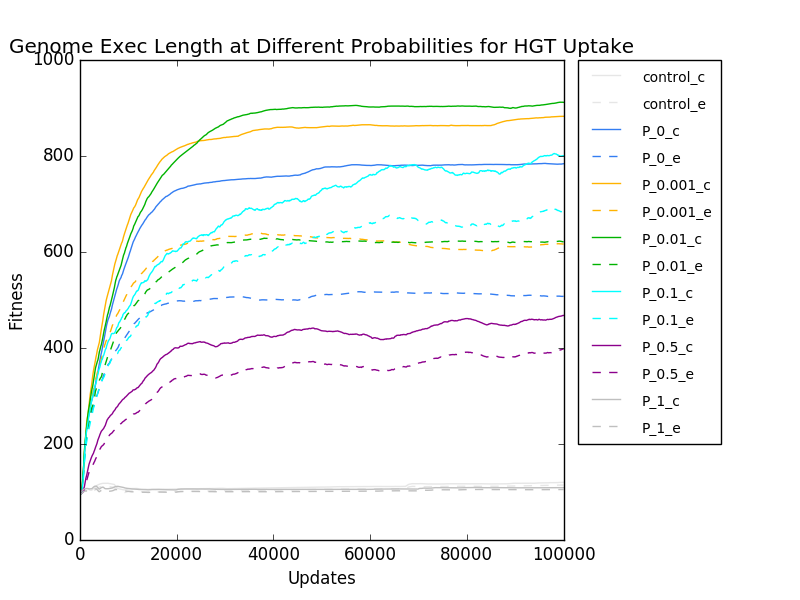

In [15]:
%run ../../../../research_scripts/quickplot.py --samples 1000 \
--title "Genome Exec Length at Different Probabilities for HGT Uptake" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
--data_members 2 \
205_copied_and_exec_size \
average.dat 7 \"../P_0_control_*/data*/\" control_c \
average.dat 8 \"../P_0_control_*/data*/\" control_e \
average.dat 7 \"../P_0_hgtbonus_*/data*/\" P_0_c \
average.dat 8 \"../P_0_hgtbonus_*/data*/\" P_0_e \
average.dat 7 \"../P_0.001_hgtbonus_*/data*/\" P_0.001_c \
average.dat 8 \"../P_0.001_hgtbonus_*/data*/\" P_0.001_e \
average.dat 7 \"../P_0.01_hgtbonus_*/data*/\" P_0.01_c \
average.dat 8 \"../P_0.01_hgtbonus_*/data*/\" P_0.01_e \
average.dat 7 \"../P_0.1_hgtbonus_*/data*/\" P_0.1_c \
average.dat 8 \"../P_0.1_hgtbonus_*/data*/\" P_0.1_e \
average.dat 7 \"../P_0.5_hgtbonus_*/data*/\" P_0.5_c \
average.dat 8 \"../P_0.5_hgtbonus_*/data*/\" P_0.5_e \
average.dat 7 \"../P_1_hgtbonus_*/data*/\" P_1_c \
average.dat 8 \"../P_1_hgtbonus_*/data*/\" P_1_e 

ipyImage(filename='205_copied_and_exec_size.png') 

In [137]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['control', 'hgtbonus', 'hgt', 'bonus']:
        PROB = "P_" + p + "_" + t
        print PROB
        
        outfile1 = PROB + "__genome_length_executed.csv"
        !rm {outfile1}
        outfile2 = PROB + "__genome_length_copied.csv"
        !rm {outfile2}
        
        files = !ls ../{PROB}_205*/data_*/average.dat
        files_string = " ".join(files)

        !python2 ../../../../research_scripts/common/extract_single_column_to_csv.py \
        --end 7 {files_string} \
        >> {outfile1}
        
        !python2 ../../../../research_scripts/common/extract_single_column_to_csv.py \
        --end 8 {files_string} \
        >> {outfile2}


P_0_control
rm: cannot remove ‘P_0_control__genome_length_executed.csv’: No such file or directory
P_0_hgtbonus
rm: cannot remove ‘P_0_hgtbonus__genome_length_executed.csv’: No such file or directory
P_0_hgt
rm: cannot remove ‘P_0_hgt__genome_length_executed.csv’: No such file or directory
P_0_bonus
rm: cannot remove ‘P_0_bonus__genome_length_executed.csv’: No such file or directory
P_0.001_control
rm: cannot remove ‘P_0.001_control__genome_length_executed.csv’: No such file or directory
P_0.001_hgtbonus
rm: cannot remove ‘P_0.001_hgtbonus__genome_length_executed.csv’: No such file or directory
P_0.001_hgt
rm: cannot remove ‘P_0.001_hgt__genome_length_executed.csv’: No such file or directory
P_0.001_bonus
rm: cannot remove ‘P_0.001_bonus__genome_length_executed.csv’: No such file or directory
P_0.01_control
rm: cannot remove ‘P_0.01_control__genome_length_executed.csv’: No such file or directory
P_0.01_hgtbonus
rm: cannot remove ‘P_0.01_hgtbonus__genome_length_executed.csv’: No such fi

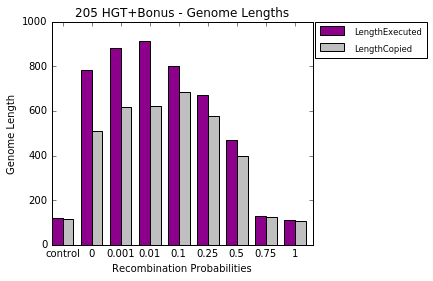

In [140]:
%run ../../../../research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Genome Length" \
-t "205 HGT+Bonus - Genome Lengths" --pair --groups=9 \
--xticks="control,0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="LengthExecuted,LengthCopied" \
--columns="1" \
205_genome_lengths.png \
P_0_control__genome_length_executed.csv \
P_0_control__genome_length_copied.csv \
P_0_hgtbonus__genome_length_executed.csv \
P_0_hgtbonus__genome_length_copied.csv \
P_0.001_hgtbonus__genome_length_executed.csv \
P_0.001_hgtbonus__genome_length_copied.csv \
P_0.01_hgtbonus__genome_length_executed.csv \
P_0.01_hgtbonus__genome_length_copied.csv \
P_0.1_hgtbonus__genome_length_executed.csv \
P_0.1_hgtbonus__genome_length_copied.csv \
P_0.25_hgtbonus__genome_length_executed.csv \
P_0.25_hgtbonus__genome_length_copied.csv \
P_0.5_hgtbonus__genome_length_executed.csv \
P_0.5_hgtbonus__genome_length_copied.csv \
P_0.75_hgtbonus__genome_length_executed.csv \
P_0.75_hgtbonus__genome_length_copied.csv \
P_1_hgtbonus__genome_length_executed.csv \
P_1_hgtbonus__genome_length_copied.csv

#ipyImage(filename='205_values_and_proportions_HGT_inst.png') 

In [80]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['control', 'hgtbonus', 'hgt', 'bonus']:
        PROB = "P_" + p + "_" + t
        print PROB
        !rm {PROB}_HGT_instructions.csv
        files = !ls ../{PROB}_205*/data_*/living_*

        for f in files:
            !python2 ../../../../research_scripts/common/count_instructions.py "A" {f} \
            >> {PROB}_HGT_instructions.csv

P_1_bonus
P_0_control
P_0_hgtbonus
P_0_hgt
P_0_bonus
P_0.001_control
P_0.001_hgtbonus
P_0.001_hgt
P_0.001_bonus
P_0.01_control
P_0.01_hgtbonus
P_0.01_hgt
Traceback (most recent call last):
  File "../../../../research_scripts/common/count_instructions.py", line 63, in <module>
    print total/orgs
ZeroDivisionError: integer division or modulo by zero
P_0.01_bonus
P_0.1_control
P_0.1_hgtbonus
P_0.1_hgt
P_0.1_bonus
P_0.25_control
P_0.25_hgtbonus
P_0.25_hgt
P_0.25_bonus
P_0.5_control
P_0.5_hgtbonus
P_0.5_hgt
P_0.5_bonus
P_0.75_control
rm: cannot remove ‘P_0.75_control_HGT_instructions.csv’: No such file or directory
P_0.75_hgtbonus
rm: cannot remove ‘P_0.75_hgtbonus_HGT_instructions.csv’: No such file or directory
P_0.75_hgt
rm: cannot remove ‘P_0.75_hgt_HGT_instructions.csv’: No such file or directory
P_0.75_bonus
rm: cannot remove ‘P_0.75_bonus_HGT_instructions.csv’: No such file or directory
P_1_control
P_1_hgtbonus
P_1_hgt
P_1_bonus


In [131]:
for p in ['0', '0.001', '0.01', '0.1', '0.25', '0.5', '0.75', '1']:
    for t in ['control', 'hgtbonus', 'hgt', 'bonus']:
        PROB = "P_" + p + "_" + t
        print PROB
        !rm {PROB}_HGT_proportion_instructions.csv
        files = !ls ../{PROB}_205*/data_*/living_*
    
        #print files
        
        for f in files:
            !python2 ../../../../research_scripts/common/count_instructions.py -p "A" {f} \
            >> {PROB}_HGT_proportion_instructions.csv

P_0_bonus
rm: cannot remove ‘P_0_bonus_HGT_proportion_instructions.csv’: No such file or directory

0.0471472096555
0.036383115783
0.0521306256353
0.0260104908585
0.0213592599259
0.0330742195147
0.0272553465985
0.0525077952588
0.0577773832618
0.0575045624642
0.0410479558931
0.0588865449885
0.0332826632696
0.0419086525877
0.0375159431559
0.0223251574902
0.0413983896132
0.0189065209038
0.0307535400817
0.0184711526272
0.0614724574788
0.0479643549772
0.025579402748
0.0265795535305
0.0533258001567
P_1_bonus
rm: cannot remove ‘P_1_bonus_HGT_proportion_instructions.csv’: No such file or directory

0.0471472096555
0.036383115783
0.0521306256353
0.0260104908585
0.0213592599259
0.0330742195147
0.0272553465985
0.0525077952588
0.0577773832618
0.0575045624642
0.0410479558931
0.0588865449885
0.0332826632696
0.0419086525877
0.0375159431559
0.0223251574902
0.0413983896132
0.0189065209038
0.0307535400817
0.0184711526272
0.0614724574788
0.0479643549772
0.025579402748
0.0265795535305
0.0533258001567


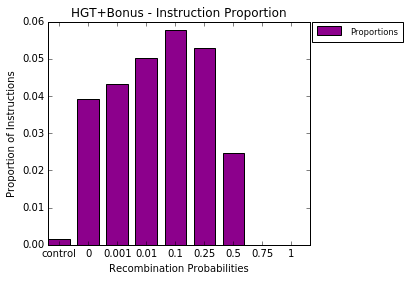

In [119]:
%run ../../../../research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Proportion of Instructions" \
-t "HGT+Bonus - Instruction Proportion" --pair --groups=9 \
--xticks="control,0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Proportions" \
--columns="1" \
205_values_and_proportions_HGT_inst.png \
P_0_control_HGT_proportion_instructions.csv \
P_0_hgtbonus_HGT_proportion_instructions.csv \
P_0.001_hgtbonus_HGT_proportion_instructions.csv \
P_0.01_hgtbonus_HGT_proportion_instructions.csv \
P_0.1_hgtbonus_HGT_proportion_instructions.csv \
P_0.25_hgtbonus_HGT_proportion_instructions.csv \
P_0.5_hgtbonus_HGT_proportion_instructions.csv \
P_0.75_hgtbonus_HGT_proportion_instructions.csv \
P_1_hgtbonus_HGT_proportion_instructions.csv


#ipyImage(filename='205_values_and_proportions_HGT_inst.png') 

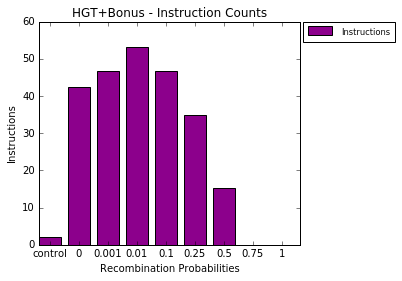

In [120]:
%run ../../../../research_scripts/graph_generation/bar_chart_from_csv.py \
-x "Recombination Probabilities" -y "Instructions" \
-t "HGT+Bonus - Instruction Counts" --pair --groups=9 \
--xticks="control,0,0.001,0.01,0.1,0.25,0.5,0.75,1" \
--legend="Instructions" \
--columns="1" \
205_counts_HGT_inst.png \
P_0_control_HGT_instructions.csv \
P_0_hgtbonus_HGT_instructions.csv \
P_0.001_hgtbonus_HGT_instructions.csv \
P_0.01_hgtbonus_HGT_instructions.csv \
P_0.1_hgtbonus_HGT_instructions.csv \
P_0.25_hgtbonus_HGT_instructions.csv \
P_0.5_hgtbonus_HGT_instructions.csv \
P_0.75_hgtbonus_HGT_instructions.csv \
P_1_hgtbonus_HGT_instructions.csv


#ipyImage(filename='205_counts_HGT_inst.png') 

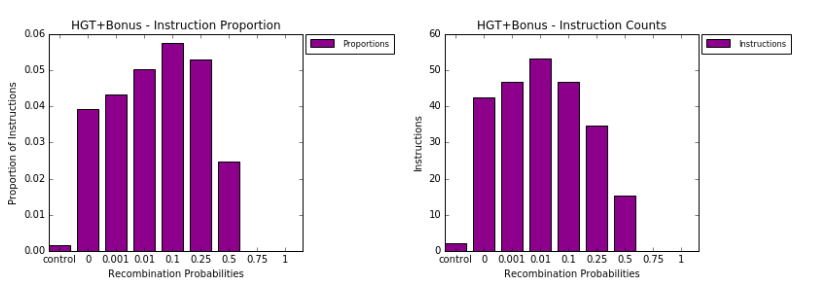

In [121]:
files = ['205_values_and_proportions_HGT_inst.png',
 '205_counts_HGT_inst.png']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=-0.5, wspace=-0.45)
for i, ax in enumerate(axes.flat, start=1):
    
    if i-1 < len(files):
        img = Image.open(files[i-1])
        ax.imshow(img)

    ax.set_axis_off() 
    i+=1
plt.show()